# AST 502 Lecture 6: Bayesian Parameter Estimation
## Erin Maier, Fall 2017, Sections 5.3, 5.6

A quick review of

- Bayes' Rule
- The process of Bayesian statistical inference (BSI)
- Bayesian priors
- Quantification of parameter uncertainties
    - Defining posterior intervals
    - Marginalization of parameters- 
- Simple examples of parameter estimation
    - Gaussian distribution with known uncertainties
    - Gaussian distribution with unknown uncertainties
    - Binomial distribution

based on Ivezic Chapter 5 and the UW ASTR 324 notebook

# Review: Bayes' Rule

Recall the key aspects of the Bayesian approach:

- Data is fixed, 
- Parameters vary - produce a pdf
- Dependency on initial knowledge/belief/conditions, called priors. 

From Ivezic, the full version of Bayes' rule as used in BSI is

$$p(M,\ \theta\ |\ D,\ I) = \frac{p(D\ |\ M,\ \theta,\ I)p(M,\ \theta\ |\ I)}{p(D\ |\ I)}$$

Let's break it down:

- **$p(M,\ \theta\ |\ D,\ I)$**: the **posterier pdf** for a model M with parameters $\theta$, given data D and prior information I.

- **$p(D\ |\ M,\ \theta,\ I)$**: the **likelihood** of data D given model M described by parameters $\theta$ and prior information I.

- **$p(M,\ \theta\ |\ I)$**: the **prior**, describing the likelihood of model M with parameters $\theta$ given prior information I, in the absence of any data.

- **$p(D\ |\ I)$**: the **probability of data**, describing the likelihood of data D occurring given prior information I

### Example: cancer testing
https://betterexplained.com/articles/an-intuitive-and-short-explanation-of-bayes-theorem/



# The Bayesian Statistical Inference Process

_credit to UW ASTR 324 notebook_

1. Formulate the likelihood, $p(D\,|\,M,\theta,I)$
2. Choose a prior $p(M,\theta\,|\,I)$, which incorporates other information beyond the data in $D$
3. Determine the posterior pdf, $p(M,\theta \,|\,D,I)$
4. Search for the model parameters that maximize $p(M,\theta \,|\,D,I)$, the _maximum a postieri_ (MAP) estimate
5. Quantify the uncertainty of the model parameter estimates

# An overview of Bayesian Priors

What is a prior? How do you choose one?

- A probability distribution that incorporates your prior knowledge/subjective belief about a parameter into the total probability distribution


- Priors can be informative (posterior is driven by a mix of data/prior, i.e. cancer testing example) or uninformative (assume nothing about parameters, posterior is data driven)


- Priors can be subjective/objective
    - Han Solo and Bayesian Priors: https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors
    - Might have historical data on distribution of parameter values
    - Might have data from previous experiments
    

- "Prior" implies chronology but this isn't true - priors can be formulated after data is taken


- "The Bayesian approach can be thought of as formalizing the process of continually refining our state of knowledge about the world, beginning with no data (as encoded by the prior), then up dating that by multiplying in the likelihood once the data D are observed to obtain the posterior. When more data are taken, then the posterior based on the first data set can be used as the prior for the second analysis."

## _$$\textrm{"Today's posterior is tomorrow's prior"}$$_
**References:**

http://www.stats.org.uk/priors/Bayes6.pdf

https://stats.stackexchange.com/questions/58564/help-me-understand-bayesian-prior-and-posterior-distributions


# Quantification of Parameter Uncertainty

The posterior pdf can be treated as any other probabilistic pdf, able to be summarized by certain point estimates or by parameter intervals defined by certain expectations of cumulative probability.

## Bayesian "Credibility Intervals" vs. Frequentist "Confidence Intervals"

The frequentist approach uses "confidence intervals" to assert a range of values which will definitely contain the true value of a given parameter a certain fraction of the time. An experiment with a 95% confidence interval means that 95 out of 100 times, the range of values covered by the result of the experiment with its uncertainties will contain the true value of the parameter.

Conversely, the Bayesian approach is based upon producing a probability distribution for values of a parameter. It uses "credibility intervals" or "credible regions" to specify a range of values for the parameter that includes a certain fraction of the total pdf. A range of values specified to be a 95% credibility interval means that there is a 95% probability that the true value of the parameter falls within that range of values. 

## Posterior Intervals

We mathematically define a Bayesian credibile interval estimate by finding a and b such that

$$\int_{-\infty}^{a}f(\theta)d\theta = \int_{b}^{\infty}f(\theta)d\theta = \frac{\alpha}{2}$$

Therefore, the probability that the true value of the parameter $\theta$ is in the region (a, b) is $1 - \alpha$. The interval (a, b) is call the _posterior interval_.

In practice, the posterior pdf is not an analytic function and can only be evaluated numerically.

## Marginalization of Parameters

Consider a posterior pdf, $p(M,\ \theta\ |\ D,\ I)$, parameterized by a vector of k free parameters, $\theta$. Some are of interest, some are not.

e.g. We want to measure the properties of a spectral line such as position, width, and strength. The spectral line has an unknown background. It must be accounted for, but we are interested only in the spectral line parameters.

To obtain the posterior pdf for an interesting parameter, we can integrate the full multi-dimensional posterior pdf over all other parameters. If we want to understand how multiple interesting parameters covary, we can integrate over all uninteresting, or _nuisance_ parameters. This procedure is called **marginalization** and produces the **marginal posterior pdf**.

## A Simple Parameter Marginalization Example

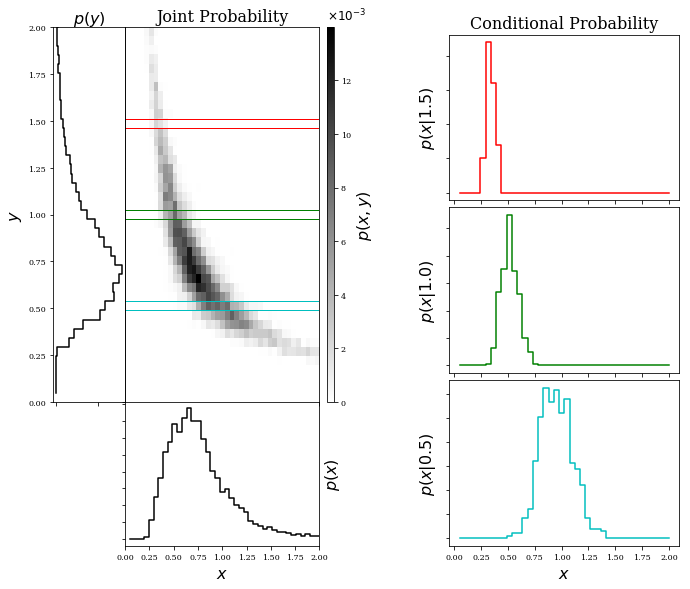

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 10)
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

def banana_distribution(N=10000):
    """This generates random points in a banana shape"""
    # create a truncated normal distribution
    theta = np.random.normal(0, np.pi / 8, 10000)
    theta[theta >= np.pi / 4] /= 2
    theta[theta <= -np.pi / 4] /= 2
    # define the curve parametrically
    r = np.sqrt(1. / abs(np.cos(theta) ** 2 - np.sin(theta) ** 2))
    r += np.random.normal(0, 0.08, size=10000)
    x = r * np.cos(theta + np.pi / 4)
    y = r * np.sin(theta + np.pi / 4)
    return (x, y)


#------------------------------------------------------------
# Generate the data and compute the normalized 2D histogram
np.random.seed(1)
x, y = banana_distribution(10000)

Ngrid = 41
grid = np.linspace(0, 2, Ngrid + 1)

H, xbins, ybins = np.histogram2d(x, y, grid)
H /= np.sum(H)

#------------------------------------------------------------
# plot the result
fig = plt.figure()

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[0, 2, 0, 2], cmap=plt.cm.binary)

cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(x, y)$', fontsize=16)
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes, fontsize=12)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(0, 2)
ax_Pxy.set_ylim(0, 2)
ax_Px.set_xlim(0, 2)
ax_Py.set_ylim(0, 2)

# label axes
ax_Pxy.set_xlabel('$x$', fontsize=16)
ax_Pxy.set_ylabel('$y$', fontsize=16)
ax_Px.set_xlabel('$x$', fontsize=16)
ax_Px.set_ylabel('$p(x)$', fontsize=16)
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$', fontsize=16)
ax_Py.set_xlabel('$p(y)$', fontsize=16)
ax_Py.xaxis.set_label_position('top')


# draw marginal probabilities
iy = [3 * Ngrid / 4, Ngrid / 2, Ngrid / 4]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([0, 2, 2, 0],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(x | %.1f)$' % ybins[iy[i]], fontsize=16)
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$x$', fontsize=16)

ax_Pxy.set_title('Joint Probability', fontsize=16)
ax_Px_y[0].set_title('Conditional Probability', fontsize=16)

plt.show()

The plot above shows a simple example of integrating a 2-D posterior pdf to obtain a 1-D marginal posterior pdf. We assume that x is an interesting parameter and y is a nuisance parameter. The right panel shows the posterior pdf of x for three known values of y. However, in practice, we do not know the value of y, so we integrate over all plausible values and obtain the marginalized posterior pdf for x, which is shown at the bottom of the left panel. 

# Simple Parameter Estimation: Gaussian Distribution

## The case of a 1-D posterior pdf with known measurement errors

Consider a set of N measurements, $\{x_{i}\}$ of the length of a rod, with known, Gaussian, heteroscedastic measurement errors $\sigma_{i}$. We want to find the posterior pdf for the length of the rod, $\mu$,

## $$p(\mu\ |\ \{x_{i}\},\ \{\sigma_{i}\})$$

Assuming that the likelihood function for a single measurement follows a Gaussian distribution, then the likelihood of obtaining data $D = \{x_{i}\}$, with $\mu$ and $\{\sigma_{i}\}$ known, is the product of the individual likelihoods,

$$p(\{x_{i}\}\ |\ \mu,\ I) = \prod_{i=1}^{N}\frac{1}{\sqrt{2\pi}\sigma_{i}}exp\left(\frac{-(x_{i}-\mu)^{2}}{2\sigma_{i}^{2}}\right)$$

The prior is chosen to be a uniform distribution over a wide range from $\mu_{min}$ to $\mu_{max}$ such that

$$p(\mu\ |\ I) = \textrm{C for }\mu_{min} < \mu < \mu_{max}$$

where $C = (\mu_{max} - \mu_{min})^{-1}$. Then the logarithm of the posterior pdf is

$$L_{p} = ln[p(\mu\ |\ \{x_{i}\},\ \{\sigma_{i}\},\ I)] = constant - \sum_{i=1}^{N}\frac{(x_{i} - \mu)^{2}}{2\sigma_{i}^{2}}$$

This is analogous to the log-likelihood of the maximum likelihood estimator in the case of a heteroscedastic Gaussian likelihood.

We are looking for the maximum likelihood estimator for $\mu$. Since the error distribution is Gaussian, there is an analytic solution found by setting the derivative of the log of the posterior pdf with respect to $\mu$ equal to 0. We obtain

$$\mu_{0} = \frac{\Sigma_{i=1}^{N}w_{i}x_{i}}{\Sigma_{i=1}^{N}x_{i}}$$

where the weights $w_{i} = \sigma_{i}^{-2}$. Thus, $\mu_{0}$ is equal to a weighted average of the individual measurements. If the errors are equal, this is the exact solution as in the case of the maximum likelihood estimator for a homoschedastic Gaussian likelihood.

The posterior pdf for $\mu$ is a Gaussian centered on $\mu_{0}$, with a width

$$\sigma_{\mu} = \left(-\frac{d^{2}L_{p}}{d\mu^{2}}|_\mu=\mu_{0}\right)^{-\frac{1}{2}} = \left(\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}}\right)^{-\frac{1}{2}} = \left(\sum_{i}w_{i}\right)^{-\frac{1}{2}}$$

It is important to note that these results are identical to the maximum likelihood method because we used a flat prior for $\mu$. The result matches the standard result because all $\sigma_{i}$ are equal to $\sigma$.

We conclude that **the posterior pdf for $\mu$ is _Gaussian when $\sigma_{i}$ are known_, regardless of data set size N.** This is not true when $\sigma$ is unknown and must also be determined from data. Let's consider a different case.

## The case of a 2-D posterior pdf with unknown measurement errors

Consider a set of N measurements, $\{x_{i}\}$, drawn from an unspecified Gaussian distribution, $\mathcal{N}(\mu,\sigma)$. In this case, $\sigma$ also needs to be determined from data, and thus we seek the two-dimensional posterior pdf,

## $$p(\mu,\ \sigma\ |\ \{x_{i}\})$$

This is a very common situation and the most common solution for it is the standard **sample arithmetic mean** and **sample standard deviation**.

However, the assumption of the Gaussian uncertainty of $\mu$ is **only valid in the case of large N** if $\sigma$ is not already known. For small N, if $\sigma$ is not known, the posterior pdf is a Student's t distribution.

This can be shown using a Bayesian framework. The likelihood for all measurements is again given by

$$p(\{x_{i}\}\ |\ \mu,\ \sigma,\ I) = \prod_{i=1}^{N}\frac{1}{\sqrt{2\pi}\sigma_{i}}exp\left(\frac{-(x_{i}-\mu)^{2}}{2\sigma_{i}^{2}}\right)$$

We then adopt a uniform prior distribution for both $\mu$ and ln $\sigma$, such that

$$p(\mu,\ \sigma,\ |\ I)\ \propto\ \frac{1}{\sigma},\ \mu_{min} \leq \mu_{max},\ \sigma_{min} \leq \sigma_{max}$$

Skipping a bit of math, eventually, the logarithm of the posterior pdf can be written in terms of only three data based quantities; N, the number of measurements in the set, $\bar{x}$, the average of the measurements, and V, where $V = \frac{(N - 1)s^{2}}{N}$, s being the sample standard deviation.

$$L_{p} = constant - (N + 1)ln\ \sigma - \frac{N}{2\sigma^{2}}((\bar{x} - \mu)^{2} + V)$$

## An example for N = 10, $\bar{x} = 1$, V = 4

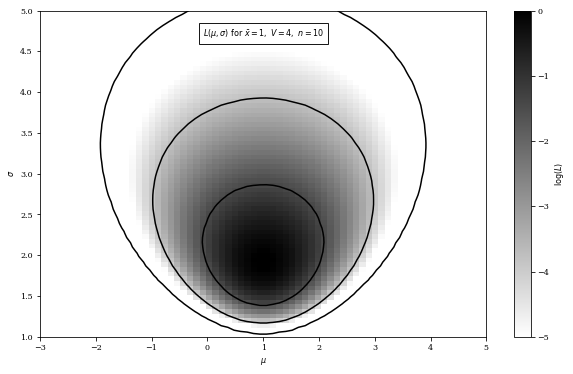

In [6]:
%matplotlib inline

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 6))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()

An illustration of the logarithm of the posterior probability density function for \mu and \sigma, L_p(\mu,\sigma) (see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1, and V = 4. The maximum of L_p is renormalized to 0, and color coded as shown in the legend. The maximum value of L_p is at \mu_0 = 1.0 and \sigma_0 = 1.8. The contours enclose the regions that contain 0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.

Maximum of $L_{p}$ at $(\mu_{0}, \sigma_{0}) = (\bar{x}, \frac{VN}{N + 1}$). For a given $\sigma$, maximum is along line of $\mu = \mu_{0} = \bar{x}$, and the posterior pdf is Gaussian, but in reality we don't know the true value of $\sigma$ and must marginalize it.

C:\Users\Erin\AppData\Local\Enthought\Canopy\User\lib\site-packages\astroML\resample.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ind = rng.randint(n_samples, size=(n_bootstraps, n_samples))


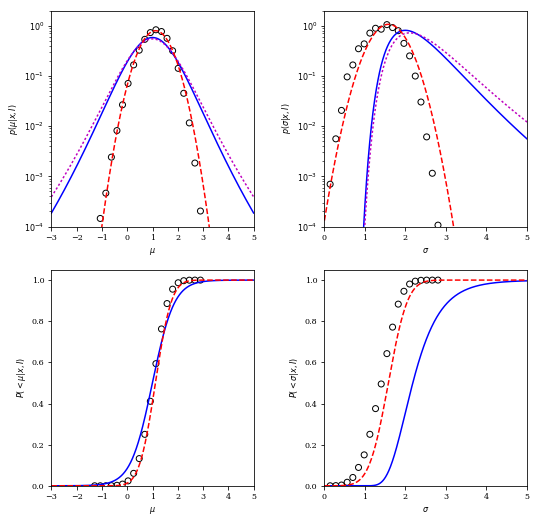

In [7]:
%matplotlib inline
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats import mean_sigma
from astroML.resample import bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


#------------------------------------------------------------
# Define functions for computations below
#  These are expected analytic fits to the posterior distributions
def compute_pmu(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * n)


def compute_pmu_alt(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * (n - 1))


def compute_psig(sig, V, n):
    return (sig ** -n) * np.exp(-0.5 * n * V / sig ** 2)


def compute_psig_alt(sig, V, n):
    return (sig ** -(n - 1)) * np.exp(-0.5 * n * V / sig ** 2)


def gaussian(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)


#------------------------------------------------------------
# Draw a random sample from the distribution, and compute
# some quantities
n = 10
xbar = 1
V = 4
sigma_x = np.sqrt(V)

np.random.seed(10)
xi = np.random.normal(xbar, sigma_x, size=n)

mu_mean, sig_mean = mean_sigma(xi, ddof=1)

# compute the analytically expected spread in measurements
mu_std = sig_mean / np.sqrt(n)
sig_std = sig_mean / np.sqrt(2 * (n - 1))

#------------------------------------------------------------
# bootstrap estimates
mu_bootstrap, sig_bootstrap = bootstrap(xi, 1E6, mean_sigma,
                                        kwargs=dict(ddof=1, axis=1))

#------------------------------------------------------------
# Compute analytic posteriors

# distributions for the mean
mu = np.linspace(-3, 5, 1000)
dmu = mu[1] - mu[0]

pmu = compute_pmu(mu, 1, 4, 10)
pmu /= (dmu * pmu.sum())

pmu2 = compute_pmu_alt(mu, 1, 4, 10)
pmu2 /= (dmu * pmu2.sum())

pmu_norm = gaussian(mu, mu_mean, mu_std)
pmu_norm /= (dmu * pmu_norm.sum())

mu_hist, mu_bins = np.histogram(mu_bootstrap, 20)
mu_dbin = np.diff(mu_bins).astype(float)
mu_hist = mu_hist / mu_dbin / mu_hist.sum()

# distributions for the standard deviation
sig = np.linspace(1E-4, 8, 1000)
dsig = sig[1] - sig[0]
psig = compute_psig(sig, 4, 10)
psig /= (dsig * psig.sum())

psig2 = compute_psig_alt(sig, 4, 10)
psig2 /= (dsig * psig2.sum())

psig_norm = gaussian(sig, sig_mean, sig_std)
psig_norm /= (dsig * psig_norm.sum())

sig_hist, sig_bins = np.histogram(sig_bootstrap, 20)
sig_dbin = np.diff(sig_bins).astype(float)
sig_hist = sig_hist / sig_dbin / sig_hist.sum()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(wspace=0.35, right=0.95,
                    hspace=0.2, top=0.95)

# plot posteriors for mu
ax1 = plt.subplot(221, yscale='log')
ax1.plot(mu, pmu, '-b')
ax1.plot(mu, pmu2, ':m')
ax1.plot(mu, pmu_norm, '--r')
ax1.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist,
            color='k', facecolor='none')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$p(\mu|x,I)$')

ax2 = plt.subplot(223, sharex=ax1)
ax2.plot(mu, pmu.cumsum() * dmu, '-b')
ax2.plot(mu, pmu_norm.cumsum() * dmu, '--r')
ax2.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist.cumsum() * mu_dbin,
            color='k', facecolor='none')
ax2.set_xlim(-3, 5)

ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$P(<\mu|x,I)$')

# plot posteriors for sigma
ax3 = plt.subplot(222, sharey=ax1)
ax3.plot(sig, psig, '-b')
ax3.plot(sig, psig2, ':m')
ax3.plot(sig, psig_norm, '--r')
ax3.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist,
            color='k', facecolor='none')
ax3.set_ylim(1E-4, 2)

ax3.set_xlabel(r'$\sigma$')
ax3.set_ylabel(r'$p(\sigma|x,I)$')

ax4 = plt.subplot(224, sharex=ax3, sharey=ax2)
ax4.plot(sig, psig.cumsum() * dsig, '-b')
ax4.plot(sig, psig_norm.cumsum() * dsig, '--r')
ax4.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist.cumsum() * sig_dbin,
            color='k', facecolor='none')
ax4.set_ylim(0, 1.05)
ax4.set_xlim(0, 5)

ax4.set_xlabel(r'$\sigma$')
ax4.set_ylabel(r'$P(<\sigma|x,I)$')

plt.show()

The solid line in the top-left panel shows the posterior probability density function $p(\mu\ |\ \{x_i\},\ I)$ described by eq. 5.60, for N = 10, x = 1 and V = 4 (integral over $\sigma$ for the two-dimensional distribution shown in figure 5.4). The dotted line shows an equivalent result when the prior for $\sigma$ is uniform instead of proportional to $\sigma$ - 1. The dashed line shows the Gaussian distribution with parameters given by eqs. 3.31 and 3.34. For comparison, the circles illustrate the distribution of the bootstrap estimates for the mean given by eq. 3.31. The solid line in the top-right panel shows the posterior probability density function $p(\sigma\ |\ \{xi\},\ I)$ described by eq. 5.62 (integral over $\mu$ for the two-dimensional distribution shown in figure 5.4). The dotted line shows an equivalent result when the prior for $\sigma$ is uniform. The dashed line shows a Gaussian distribution with parameters given by eqs. 3.32 and 3.35. The circles illustrate the distribution of the bootstrap estimates for $\sigma$ given by eq. 3.32. The bottom two panels show the corresponding cumulative distributions for solid and dashed lines, and for bootstrap estimates, from the top panel.

# Simple Parameter Estimation: Binomial Distribution

_credit to UW ASTR 324 notebook_

Consider a general set of N measurements, $x_{i}$, drawn from a binomial distribution described by parameter b. We seek the posterior pdf

## $$p(b\ |\ \{x_{i}\})$$

In the case of large N, the results follow the general discussion for a univariate binomial distribution, with the error in b given by a Gaussian approximation. Let's consider the case of small N, and let's also consider an astronomical situation, where we are attempting to compute the fraction of galaxies which show evidence for having a black hole in the center. The data set $\{x_{i}\}$ is discrete; every outcome is either 0 (no black hole) or 1 (black hole). 

If you observe N galaxies and observe k to show evidence of having a black hole in the center, the probability of having a black hole, b, can be initially estimated as $b_{0} = \frac{k}{N}$. For a model characterized by probability of success b, the probability that a given data set contains k successful outcomes is given by

$$p(k\ |\ b,\ N) = \frac{N!}{k!(N - k)!}b^{k}(1 - b)^{N - k}$$

If we assume the prior for b is flat in the range 0 - 1, then the posterior pdf for b is

$$p(b\ |\ k,\ N) = Cb^{k}(1 - b)^{N - k}$$

with the normalization constant C determined by the condition

$$\int_{0}^{1}p(b\ |\ k,\ N)db = 1$$

For a concrete numerical example, let us assume that we studied $N = 10$ galaxies and found a black hole in $k = 4$ of them. Our best estimate for the fraction of galaxies with black holes is $b_o = k/N = 0.4$. An interesting question is, “What is the probability that, say, $b < 0.1$?”. For example, your colleague’s theory placed an upper limit of 10% for the fraction of galaxies with black holes and you want to test this theory using classical framework “Can it be rejected at a confidence level $\alpha = 0.01$?”.

In other words, if the probability of $b < 0.1$, given data, is smaller than 0.01 (that is, the probability of $b > 0.1$ is larger than 0.99) we reject the theory (in classical statistical hypothesis testing), and if the probability of $b < 0.1$ is larger than 0.01 we cannot reject the theory (which does not prove that the theory is correct!) The Gaussian approximation should be avoided when N is small or $b_{0}$ is close to 0 or 1.

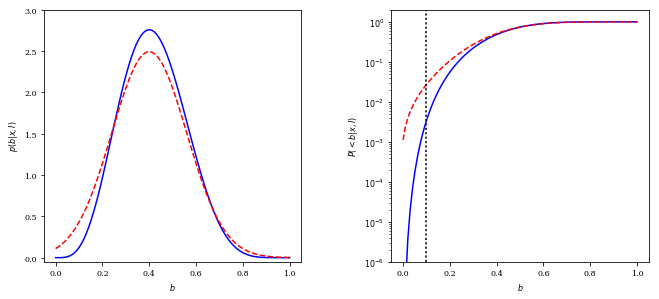

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm, binom
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Plot posterior as a function of b
n = 10  # number of points
k = 4   # number of successes from n draws

b = np.linspace(0, 1, 100)
db = b[1] - b[0]

# compute the probability p(b) (eqn. 5.70)
p_b = b ** k * (1 - b) ** (n - k)
p_b /= p_b.sum()
p_b /= db
cuml_p_b = p_b.cumsum()
cuml_p_b /= cuml_p_b[-1]

# compute the gaussian approximation (eqn. 5.71)
p_g = norm(k * 1. / n, 0.16).pdf(b)
cuml_p_g = p_g.cumsum()
cuml_p_g /= cuml_p_g[-1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

ax = fig.add_subplot(121)
ax.plot(b, p_b, '-b')
ax.plot(b, p_g, '--r')

ax.set_ylim(-0.05, 3)

ax.set_xlabel('$b$')
ax.set_ylabel('$p(b|x,I)$')

ax = fig.add_subplot(122, yscale='log')
ax.plot(b, cuml_p_b, '-b')
ax.plot(b, cuml_p_g, '--r')
ax.plot([0.1, 0.1], [1E-6, 2], ':k')

ax.set_xlabel('$b$')
ax.set_ylabel('$P(<b|x,I)$')
ax.set_ylim(1E-6, 2)

plt.show()

The solid line in the left panel shows the posterior pdf p(b|k, N) described by eq. 5.71, for k = 4 and N = 10. The dashed line shows a Gaussian approximation described in Section 3.3.3. The right panel shows the corresponding cumulative distributions. A value of 0.1 is marginally likely according to the Gaussian approximation (p_approx(< 0.1) ~ 0.03) but strongly rejected by the true distribution (p_true(< 0.1) ~ 0.003).

# Next time: Bayesian model selection